In [1]:
from sqlalchemy import create_engine

In [2]:
engine = create_engine('sqlite:///dados/getninjas.db')

In [3]:
conn = engine.connect()

In [4]:
import pandas as pd

In [5]:
dados_getninjas = pd.read_sql_table('users', conn)

In [6]:
dados_getninjas.head()

,id,created_at,updated_at,confirmed_at,name,email,cpf,admin,sign_in_count,last_sign_in_at
0,4442066,2018-01-01 12:14:14.000000,2018-01-01 12:14:14.000000,None,Tarcila,4442066@getninjas.example,224.962.961-50,0,1,2018-01-01 12:14:14.000000
1,4442106,2018-01-01 12:46:35.000000,2018-01-02 00:40:03.000000,2018-01-02 00:40:03.000000,Daniel,4442106@getninjas.example,972.910.251-46,0,2,2018-01-01 12:46:35.000000
2,4443684,2018-01-02 00:01:28.000000,2018-01-02 00:01:28.000000,None,Karla,4443684@getninjas.example,558.559.398-43,0,1,2018-01-02 00:01:28.000000
3,4445440,2018-01-02 13:03:20.000000,2018-01-02 13:03:20.000000,None,Breno,4445440@getninjas.example,173.636.200-92,0,1,2018-01-02 13:03:20.000000
4,4445592,2018-01-02 13:22:24.000000,2018-01-02 13:22:24.000000,None,Cláudia,4445592@getninjas.example,414.380.424-38,0,1,2018-01-02 13:22:24.000000


In [7]:
dados_req = pd.read_sql_table('requests', conn)

In [8]:
dados_req.head()

,id,user_id,category_id,internal_status,num_leads,request_revenue
0,5140020,4446527,2,Encerrada,5,11.62
1,5555745,5055515,6,Encerrada,4,14.80
2,5829527,5218363,6,Encerrada,6,15.98
3,5819994,5299930,6,Encerrada,5,0.29
4,5719354,5211681,6,Encerrada,5,22.60


In [9]:
dados_cat = pd.read_sql_table('categories', conn)

In [10]:
dados_cat.head()

,id,name,friendly_name,url,level
0,5,Esportes,Professores para Esportes,aulas/esportes,1
1,35,Cabeleireiros,Cabeleireiros,moda-e-beleza/cabeleireiros,1
2,98,Gesso e DryWall,Gesseiros,reformas-e-reparos/gesso-e-drywall,1
3,118,Convites,Designers de convites,design-e-tecnologia/convites,1
4,181,Fora da Garantia,Assistências Técnicas para Lava Roupa LG,assistencia-tecnica/lava-roupa/lg/fora-da-garantia,3


In [13]:
dados_all = pd.merge(dados_req, dados_cat, left_on='category_id', right_on='id', suffixes=['_requests', '_categories'])

In [14]:
dados_all.head()

,id_requests,user_id,category_id,internal_status,num_leads,request_revenue,id_categories,name,friendly_name,url,level
0,5140020,4446527,2,Encerrada,5,11.62,2,Escolares e Reforço,Professores para Reforço,aulas/escolares-e-reforco,1
1,5482407,4961047,2,Encerrada,8,16.31,2,Escolares e Reforço,Professores para Reforço,aulas/escolares-e-reforco,1
2,5555745,5055515,6,Encerrada,4,14.80,6,Outros,Professores Particulares,aulas/outros,1
3,5829527,5218363,6,Encerrada,6,15.98,6,Outros,Professores Particulares,aulas/outros,1
4,5819994,5299930,6,Encerrada,5,0.29,6,Outros,Professores Particulares,aulas/outros,1


In [18]:
consulta = """
            SELECT c.name as nome_categoria, count(*) as qtd_pedidos
            FROM requests r
            INNER JOIN categories c
            ON r.category_id = c.id
            GROUP BY c.name
            ORDER BY qtd_pedidos DESC
            LIMIT 10
"""

<AxesSubplot:>

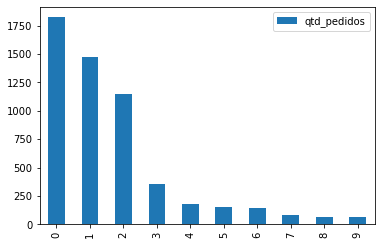

In [23]:
pd.read_sql_query(consulta, conn).plot(kind='bar')

In [ ]:
DataFrame + SQLAlchemy